In [1]:
import pandas as pd
import requests
from PIL import Image
import re
from transformers import AutoProcessor, Blip2ForConditionalGeneration
import torch

/root/Documents/MP4/myvenv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
processor = AutoProcessor.from_pretrained("Salesforce/blip2-opt-2.7b")
model = Blip2ForConditionalGeneration.from_pretrained("Salesforce/blip2-opt-2.7b", torch_dtype=torch.float16)

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
model.to(device)

Blip2ForConditionalGeneration(
  (vision_model): Blip2VisionModel(
    (embeddings): Blip2VisionEmbeddings(
      (patch_embedding): Conv2d(3, 1408, kernel_size=(14, 14), stride=(14, 14))
    )
    (encoder): Blip2Encoder(
      (layers): ModuleList(
        (0-38): 39 x Blip2EncoderLayer(
          (self_attn): Blip2Attention(
            (dropout): Dropout(p=0.0, inplace=False)
            (qkv): Linear(in_features=1408, out_features=4224, bias=True)
            (projection): Linear(in_features=1408, out_features=1408, bias=True)
          )
          (layer_norm1): LayerNorm((1408,), eps=1e-06, elementwise_affine=True)
          (mlp): Blip2MLP(
            (activation_fn): GELUActivation()
            (fc1): Linear(in_features=1408, out_features=6144, bias=True)
            (fc2): Linear(in_features=6144, out_features=1408, bias=True)
          )
          (layer_norm2): LayerNorm((1408,), eps=1e-06, elementwise_affine=True)
        )
      )
    )
    (post_layernorm): LayerNorm((

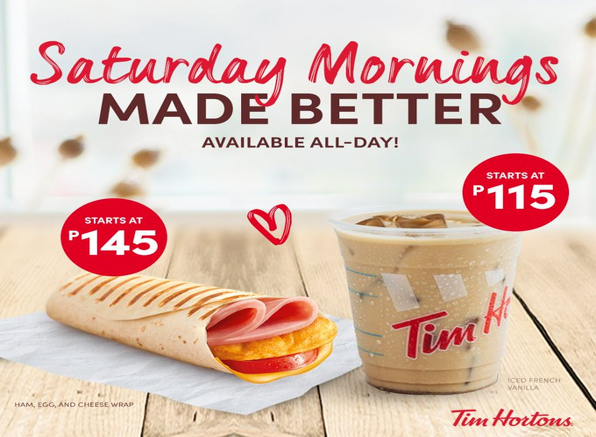

In [ ]:
url = 'https://pbs.twimg.com/media/Eo8N3JLVoAAlDJT?format=jpg&name=small'
image = Image.open(requests.get(url, stream=True).raw).convert('RGB')
display(image.resize((596, 437)))

In [ ]:

prompt = "Description :"

inputs = processor(image, text=prompt, return_tensors="pt").to(device, torch.float16)

generated_ids = model.generate(**inputs, max_new_tokens=30)
generated_text = processor.batch_decode(generated_ids, skip_special_tokens=True)[0].strip()
print(generated_text)

tim hortons sunday mornings made better


In [ ]:
df = pd.read_excel("behaviour_simulation_train.xlsx")

In [ ]:
df.head()

,id,date,likes,content,username,media,inferred company
0,1,2020-12-12 00:47:00,1,"Spend your weekend morning with a Ham, Egg, an...",TimHortonsPH,[Photo(previewUrl='https://pbs.twimg.com/media...,tim hortons
1,2,2018-06-30 10:04:20,2750,Watch rapper <mention> freestyle for over an H...,IndyMusic,[Photo(previewUrl='https://pbs.twimg.com/media...,independent
2,3,2020-09-29 19:47:28,57,Canadian Armenian community demands ban on mil...,CBCCanada,[Photo(previewUrl='https://pbs.twimg.com/media...,cbc
3,4,2020-10-01 11:40:09,152,"1st in Europe to be devastated by COVID-19, It...",MKWilliamsRome,[Photo(previewUrl='https://pbs.twimg.com/media...,williams
4,5,2018-10-19 14:30:46,41,Congratulations to Pauletha Butts of <mention>...,BGISD,[Photo(previewUrl='https://pbs.twimg.com/media...,independent


In [ ]:
df.media[0]

"[Photo(previewUrl='https://pbs.twimg.com/media/Eo8N3JLVoAAlDJT?format=jpg&name=small', fullUrl='https://pbs.twimg.com/media/Eo8N3JLVoAAlDJT?format=jpg&name=large')]"

In [ ]:

def Captioning_image(df, media, model):
  Captions = []
  prompt = ""

  for num, text in enumerate(df.media[3000:4000]) :
    url_pattern = re.compile(r"'(https?://[^\s]+)'")
    urls = url_pattern.findall(text)
    caption = ""
    for i, url in enumerate(urls):
      try :
        image = Image.open(requests.get(url, stream=True).raw).convert('RGB')
        # display(image.resize((596, 437)))
        inputs = processor(image, text=prompt, return_tensors="pt").to(device, torch.float16)
        generated_ids = model.generate(**inputs, max_new_tokens=25)
        generated_text = processor.batch_decode(generated_ids, skip_special_tokens=True)[0].strip()
        caption += f"Image{i} : {generated_text}. "
      except :
        caption += "Error while doing image captioning."
    Captions.append(caption)
    if num%25 == 0: 
      print(num) 
  return Captions

In [ ]:
captions = Captioning_image(df, "media", model)
caption_df = pd.DataFrame(captions)
file_path = '3000-3999.csv'
caption_df.to_csv(file_path, index=False)

1
2


3
4
5
6
7


In [ ]:
df["image_caption"] = captions